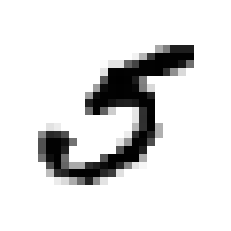

Wall time: 14.9 s
[5]
[1.      0.72895 1.     ]
[[49925  4654]
 [ 1313  4108]]
0.4688427299703264
0.7577937649880095
0.5792850595783684


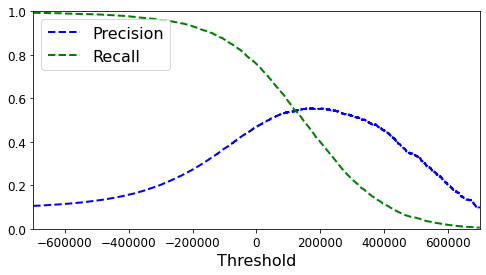

True
0.5230584347303591


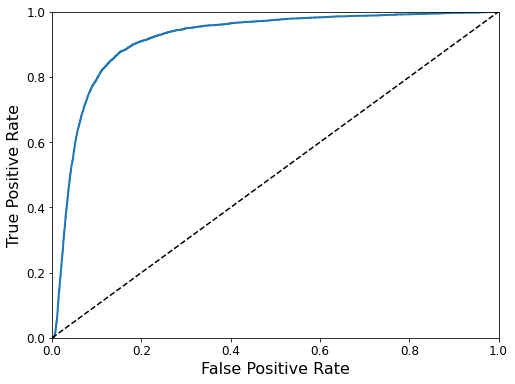

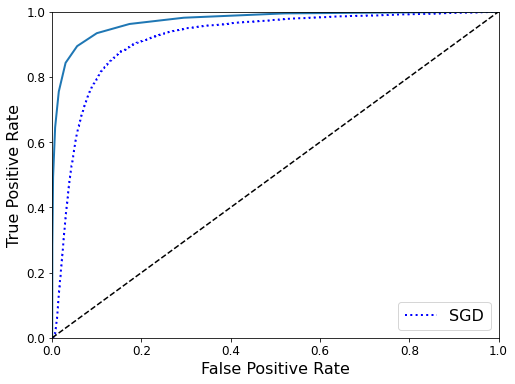

0.9727987276449468
Wall time: 7.8 s
Wall time: 2min 9s
Wall time: 18.9 s
Wall time: 7.33 s


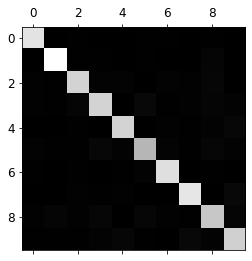

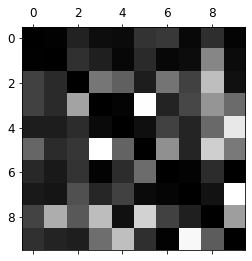

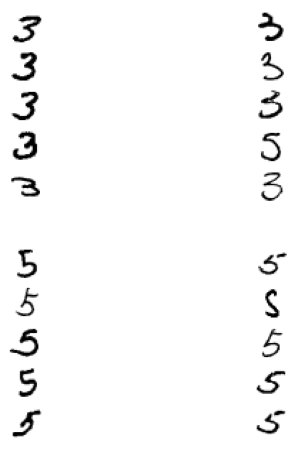

Wall time: 1min 41s
[[False  True]]
0.23978719361580844 [0.         0.47957439] 0.3012137484952992


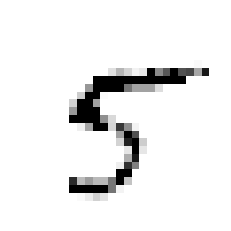

In [4]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

PROJECT_ROOT_DIR="."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path=os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID, fig_id+".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format="png",dpi=300)    
    


def sort_by_target(mnist):
    reorder_train=np.array(sorted([(target, i)for i,target in enumerate(mnist.target[:60000])]))[:,1]
    reorder_test=np.array(sorted([(target,i)for i, target in enumerate(mnist.target[60000:])]))[:,1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000]=mnist.target[reorder_train]
    mnist.data[60000:]=mnist.data[reorder_test+60000]
    mnist.target[60000:]=mnist.target[reorder_test+60000]


                                                                                            
try:
    from sklearn.datasets import fetch_openml
    mnist=fetch_openml("mnist_784",version=1,cache=True)
    mnist.target=mnist.target.astype(np.int8)
    sort_by_target(mnist)

except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist=fetch_mldata("MNIST original")
mnist["data"],mnist["target"] 

mnist.data.shape
X,y=mnist["data"],mnist["target"]
y.shape
some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")
#save_fig("some_digit_plot")
plt.show()

#画像描画
def plot_digit(data):
    image=data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary,interpolation="nearest")##画像やヒートマップを描画する
    plt.axis("off")##軸ラベル非表示
    

def plot_digits(instances, images_per_row=10, **options):
    size=28
    images_per_row=min(len(instances),images_per_row)
    images=[instance.reshape(size,size) for instance in instances]
    n_rows=(len(instances)-1)//images_per_row+1
    row_imaves=[]
    n_empty=n_rows*images_per_row-len(instances)
    images.append(np.zeros((size,size*n_empty)))
    for row in range(n_rows):
        rimages = images[row*images_per_row:(row + 1)*images_per_row]
        row_imaves.append(np.concatenate(rimages, axis=1))
    image=np.concatenate(rimages,axis=0)
    plt.imshow(image,cmap=mpl.cm.binary, **options)
    plt.axis("off")
                    
    
    
y[36000]

X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

y_train_5 = (y_train ==5)
y_test_5 = (y_test==5)

#確率的勾配降下法
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5,tol=-np.infty, random_state=0)
%time sgd_clf.fit(X_train, y_train)

print(sgd_clf.predict([some_digit]))

#交差検証による性能指標
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5,cv=3,scoring="accuracy")

from sklearn.base import BaseEstimator
class Never5Classfier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)
    
never_5_clf=Never5Classfier()
print(cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy"))

#混同行列による性能指標
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train_5, y_train_pred))

#適合率と再現率
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))

print(recall_score(y_train_5,y_train_pred))

#f1値
from sklearn.metrics import f1_score
f1 = f1_score(y_train_5, y_train_pred)
print(f1)

y_scores = sgd_clf.decision_function([some_digit])
y_scores

threshold=0
y_some_digit_pred=(y_scores > threshold)
y_some_digit_pred
threshold=200000
y_some_digit_pred=(y_scores > threshold)
y_some_digit_pred
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,cv=3,method="decision_function")
y_scores.shape


from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--", label="Precision",linewidth=2)
    plt.plot(thresholds, recalls[:-1],"g--", label="Recall",linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.ylim([0,1])
    

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls,thresholds)
plt.xlim([-700000,700000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

print((y_train_pred == (y_scores >0)).all())
y_train_pred_90=(y_scores > 70000)
print(precision_score(y_train_5,y_train_pred_90))
recall_score(y_train_5, y_train_pred_90)

#rocカーブ
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
        plt.plot(fpr, tpr, linewidth=2, label=label)
        plt.plot([0,1],[0,1],"k--")
        plt.axis([0,1,0,1])
        plt.xlabel("False Positive Rate", fontsize=16)
        plt.ylabel("True Positive Rate", fontsize=16)

        
plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()


#rocAUC 面積
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest=cross_val_predict(forest_clf,
                                  X_train, y_train_5,cv=3,
                                 method="predict_proba")

y_scores_forest= y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, "b:",linewidth=2,label="SGD")
plt.legend(loc="lower right",fontsize=16)
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.show()

auc = roc_auc_score(y_train_5,y_scores_forest)
print(auc)

y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)
recall_score(y_train_5, y_train_pred_forest)

%time sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

np.argmax(some_digit_scores)
sgd_clf.classes_[5]


#OVO->OVA
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
%time ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])
len(ovo_clf.estimators_)

%time forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit]) 
forest_clf.predict_proba([some_digit])

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
%time X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train,cv=3,scoring="accuracy")

y_train_pred=cross_val_predict(sgd_clf, X_train_scaled, y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
plt.matshow(conf_mx,cmap=plt.cm.gray)
#save_fig("SGDClassifier_confusion_matrix")
plt.show()
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx / row_sums

np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
#save_fig("SGDClassifier_confusion_matrix_error_rate")
plt.show()

cl_a,cl_b=3,5
X_aa=X_train[(y_train==cl_a)&(y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a)&(y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b)&(y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b)&(y_train_pred==cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221) ; plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222) ; plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223) ; plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224) ; plot_digits(X_bb[:25], images_per_row=5)
plt.show()

#多ラベル分類
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd =(y_train % 2==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf=KNeighborsClassifier()
%time knn_clf.fit(X_train, y_multilabel)
print(knn_clf.predict([some_digit]))

y_train_knn_pred=cross_val_predict(knn_clf, X_train,y_multilabel,cv=3,n_jobs=-1)##n_jobs=-1で全コア100％使用

#f1値
f1_macro=f1_score(y_multilabel, y_train_knn_pred, average="macro")
f1_None=f1_score(y_multilabel, y_train_knn_pred, average=None)
f1_weighted=f1_score(y_multilabel, y_train_knn_pred, average="weighted")
print(f1_macro,f1_None,f1_weighted)


#多出力分類
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

some_index=5500
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
#save_fig("cleaned_digit_example_plot")





